In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

In [2]:
sample_x=128
sample_y=128
rpn_stride=8 #down sampling

Feature_size_x=sample_x/rpn_stride
Feature_size_y=sample_y/rpn_stride
scale=[1,2,4]
ratios=[0.5,1,2]


In [3]:
fx=np.arange(Feature_size_x)
fy=np.arange(Feature_size_y)

这里的meshgrid 可以进行快速的组合，省去for循环

In [4]:
Fx,Fy=np.meshgrid(fx,fy)

In [5]:
Fx=Fx.flatten()
Fy=Fy.flatten()

scales=X+Y
ratios=X:Y

In [6]:
scales,ratios=np.meshgrid(scale,ratios)
scales=scales.flatten()
ratios=ratios.flatten()

In [7]:
# def anchor(Feature_x,Feature_y,rpn_stride,ratios,scales):
#     scales,ratios=np.meshgrid(scale,ratios)
#     scales=scales.flatten()
#     ratios=ratios.flatten()
#     #计算anchor尺寸
#     scalesX=scales*np.sqrt(ratios)
#     scalesY=scales/np.sqrt(ratios)
#     #映射到原图为
#     ShiftX=np.arange(0,Feature_x)*rpn_stride
#     ShiftY=np.arange(0,Feature_y)*rpn_stride
#     #原图中的中心点为：
#     ShiftX,ShiftY=np.meshgrid(ShiftX,ShiftY)
#     print(ShiftX)
#     centerX,anchorX=np.meshgrid(ShiftX,scalesX)
#     centerY,anchorY=np.meshgrid(ShiftY,scalesY)
#     #生成中心点的坐标和anchor size
#     #anchor_center(x,y)
#     anchor_center=np.stack([centerX,centerY],axis=2).reshape(-1,2)
#     anchor_size=np.stack([anchorX,anchorY],axis=2).reshape(-1,2)
#     boxes=np.concatenate([anchor_center-0.5*anchor_size,anchor_center+0.5*anchor_size],axis=1)
#     return boxes


def anchor(map_height,map_whidth,rpn_stride,ratios,scales):
       scales,ratios=np.meshgrid(scales,ratios)
       scaleX=scales*np.sqrt(ratios)
       scaleY=scales/np.sqrt(ratios)

       centerX=np.arange(0,map_whidth)*rpn_stride
       centerY=np.arange(0,map_height)*rpn_stride
       centerX,centerY=np.meshgrid(centerX,centerY)
       scaleX,centerX=np.meshgrid(scaleX,centerX)
       scaleY, centerY = np.meshgrid(scaleY, centerY)

       loc=np.stack([centerX,centerY],axis=2).reshape(-1,2)
       scale=np.stack([scaleX,scaleY],axis=2).reshape(-1,2)
       print(loc.shape)
       print(scale.shape)
       box=np.concatenate([loc-0.5*scale,loc+0.5*scale],axis=1)
       print(box.shape)
       return box


plt.figure(figsize=(10,10))
image=Image.open("/Users/crispus/Desktop/leetcode/练习打卡/t1.jpg")
image=image.resize((128,128))

<Figure size 720x720 with 0 Axes>

(20736, 2)
(20736, 2)
(20736, 4)


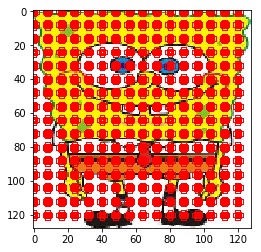

In [8]:
#asx 是获取plt图片坐标上的信息，然后在坐标上进行添加，如果plt在上一个格子中展示了，则这次获得的plot中不会有图片的。
plt.imshow(image)
asx=plt.gca()
anchors=anchor(Feature_size_x,Feature_size_y,rpn_stride,ratios,scales)
for i in range(anchors.shape[0]):
    box=anchors[i]
    #patches 是在原有图片上进行添加小的方格。
    #face color是填充。
    rec=patches.Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1],edgecolor='r',facecolor="none")
    asx.add_patch(rec)

In [79]:
def iou_judge(bo)

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12]])